> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset on [No-show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected/downloaded for analysis. Read through the description available on the homepage-links present [here](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True). List all column names in each table, and their significance. In case of multiple tables, describe the relationship between tables. 


### Question(s) for Analysis
>**Tip**: Clearly state one or more questions that you plan on exploring over the course of the report. You will address these questions in the **data analysis** and **conclusion** sections. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline


UsageError: Line magic function `%` not found.


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
df=pd.read_csv("../Udacity Data Anayltic Project 1/noshowappointments-kagglev2-may-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.shape

(110527, 14)

In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> **Summary**: We can see from this summary statistic that
We have a **Minimum Age of -1** which is not normal and Our **Maxium Age of 115** 
with a **Maximum of 4 Hadicap**
with atleast on these patient been Hypertensive,diabetic or Alcholic
<ul>
<li>29.8% of people -- Recived a Scholarship</li>
<li>39.8 of people --  Are Hypertensive</li>
<li>25.8% of Patients-- Are Diabetetics</li>
<li>17.2% of Patients -- Are Alcholic</li>
<li>16.2% of Patients -- Are Handicap</li>
<li>46.7% of Patients -- Recived an SMS</li>
</ul>

And the majority of patients are between 37 and 55

In [5]:
df.info()#Let's Check for missen value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
#We Won't  be needing the PatientId--> AppointmentID -->in our data so let drop them 
df.drop(['PatientId','AppointmentID'], axis=1, inplace=True)
df.head(0)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


#### Observation
> **We notice that**:
Our **Min age is -1** which is not normal
Mean while our **Mean age is 37** and our **Max is 115**
So  wil need to drop the **Row** of our min age and Re-do **"df. describe ()"**

In [7]:
#Let Check for the Unique values for each column
df.nunique()

Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

> **We Have**:
Unique values for these columns
<ul>
<li>Age                  104</li>
<li>Neighbourhood         81</li>
<li>Handcap                5</li>
<li>Others              2</li>  
</ul>
Others (Gender,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received and No-show)
We will check for duplicates in the entire dataframe and prints those duplicates


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

#### Rename Columns
<ul>
<li>Let's Rename the No-show to No_show</li>
<li>And We also need rename the Hipertension to Hypertension</li>
    </ul>

In [8]:
#Let rename the No-show column to No_show
df.rename(columns ={'No-show':'No_show'}, inplace = True )
df.head(0)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show


In [9]:
#Let rename the Hipertension column  to Hypertension
df.rename(columns ={'Hipertension':'Hypertension'}, inplace = True )
df.head(0)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show


In [10]:
#Let rename the Handcap column  to Handicap
df.rename(columns ={'Handcap':'Handicap'}, inplace = True )
df.head(0)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show


In [11]:
#Let's drop the Min Age frist let query that Row
df.query('Age == -1')

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
99832,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [12]:
#Now Let's drop that Row 
df.drop(labels=99832, axis = 0, inplace =True)

In [13]:
#Let's Print some Again discriptive statistics for each column of data 
df. describe ()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [14]:
#let's check our data fro missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Gender          110526 non-null  object
 1   ScheduledDay    110526 non-null  object
 2   AppointmentDay  110526 non-null  object
 3   Age             110526 non-null  int64 
 4   Neighbourhood   110526 non-null  object
 5   Scholarship     110526 non-null  int64 
 6   Hypertension    110526 non-null  int64 
 7   Diabetes        110526 non-null  int64 
 8   Alcoholism      110526 non-null  int64 
 9   Handicap        110526 non-null  int64 
 10  SMS_received    110526 non-null  int64 
 11  No_show         110526 non-null  object
dtypes: int64(7), object(5)
memory usage: 11.0+ MB


> **We noticed**:
They are no missing values

#### Drop Duplicate Data
<ul>
<li>We will Frist check for the number of duplicates</li>
<li>Then we will list out somr duplicates</li>
<li>Then we wildrop all the duplicate rows</li>
    </ul>

In [15]:
# Let's print the Sum of all duplicates
sum(df.duplicated())

635

In [16]:
df.loc[df.duplicated(keep = False), :]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
153,F,2016-04-28T16:38:34Z,2016-04-29T00:00:00Z,30,ITARARÉ,0,0,0,0,0,0,No
154,F,2016-04-28T16:38:34Z,2016-04-29T00:00:00Z,30,ITARARÉ,0,0,0,0,0,0,No
368,F,2016-04-29T09:43:15Z,2016-04-29T00:00:00Z,39,PRAIA DO CANTO,0,0,0,0,0,0,No
369,F,2016-04-29T09:43:15Z,2016-04-29T00:00:00Z,39,PRAIA DO CANTO,0,0,0,0,0,0,No
370,F,2016-04-19T11:16:27Z,2016-04-29T00:00:00Z,11,BELA VISTA,0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...
108538,F,2016-06-03T08:48:26Z,2016-06-03T00:00:00Z,28,DO CABRAL,0,0,0,0,0,0,No
109646,M,2016-05-04T13:21:32Z,2016-06-01T00:00:00Z,0,FORTE SÃO JOÃO,0,0,0,0,0,0,No
109647,M,2016-05-12T12:35:04Z,2016-06-08T00:00:00Z,0,FORTE SÃO JOÃO,0,0,0,0,0,0,Yes
109649,M,2016-05-04T13:21:32Z,2016-06-01T00:00:00Z,0,FORTE SÃO JOÃO,0,0,0,0,0,0,No


> **We noticed**:
On Printing the list of Duplicates We have we have **Reapiting Rows** so **we will be droping them** 


In [17]:
# drop duplicates in both datasets
df.drop_duplicates(inplace=True)

In [18]:
# print number of duplicates again to confirm dedupe - should both be 0
print(df.duplicated().sum())

0


In [19]:
#let's check our data fro missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109891 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Gender          109891 non-null  object
 1   ScheduledDay    109891 non-null  object
 2   AppointmentDay  109891 non-null  object
 3   Age             109891 non-null  int64 
 4   Neighbourhood   109891 non-null  object
 5   Scholarship     109891 non-null  int64 
 6   Hypertension    109891 non-null  int64 
 7   Diabetes        109891 non-null  int64 
 8   Alcoholism      109891 non-null  int64 
 9   Handicap        109891 non-null  int64 
 10  SMS_received    109891 non-null  int64 
 11  No_show         109891 non-null  object
dtypes: int64(7), object(5)
memory usage: 10.9+ MB


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Let plot a histogram of the entire data frame

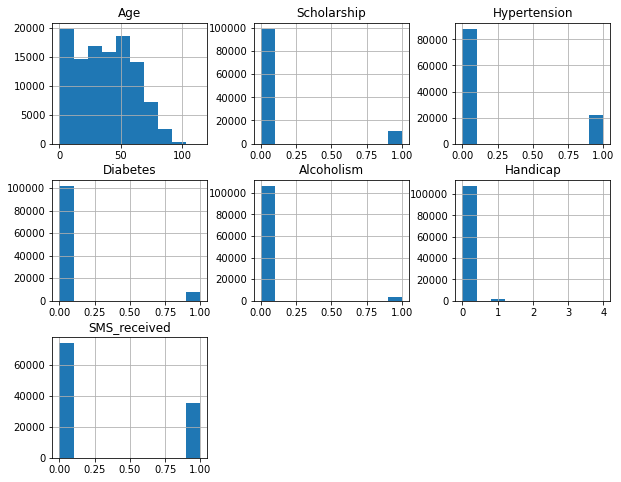

In [20]:
#Lets's plot the entire data frame
df.hist(figsize=(10,8));

## Main Research Question (Why do patients not show up for appointments and what age group is most affect? )
> **Tip**:
We will Try to answer this question in this manner
<ul>
<li>Frist we will check on "What Health condition is a  preventing factor for patients"</li>
    <li>Then We will check "What Age is mostly affected by this factor"</li>
   </ul>

### Research Question 1 (What Health condition is a preventing factor for patients)

In [21]:
Absent= df.query("No_show=='No'")
Present = df.query(" No_show=='Yes'")
Absent =df.No_show =='No'
Present =df.No_show =='Yes'

### We are Checking if a particular health condition affects attendance

In [22]:
df.Hypertension[Present].mean()

0.16870305004977826

In [23]:
df.Hypertension[Absent].mean()

0.20443543334890024

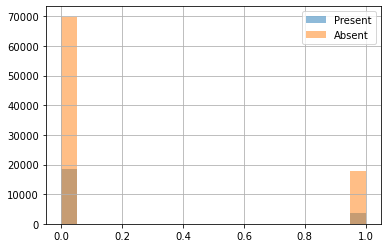

In [24]:
df.Hypertension[Present].hist(alpha=0.5, bins=20, label='Present')
df.Hypertension[Absent].hist(alpha=0.5, bins=20, label='Absent')
plt.legend();

In [25]:
df.Diabetes[Present].mean()

0.06434971490632636

In [26]:
df.Diabetes[Absent].mean()

0.07370747098288018

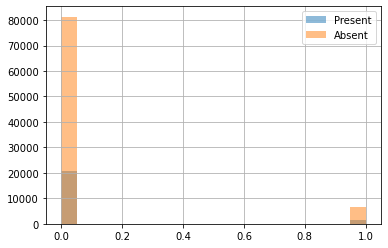

In [27]:
df.Diabetes[Present].hist(alpha=0.5, bins=20, label='Present')
df.Diabetes[Absent].hist(alpha=0.5, bins=20, label='Absent')
plt.legend();

In [28]:
df.Alcoholism[Present].mean()

0.03022897999818988

In [29]:
df.Alcoholism[Absent].mean()

0.030480790040208216

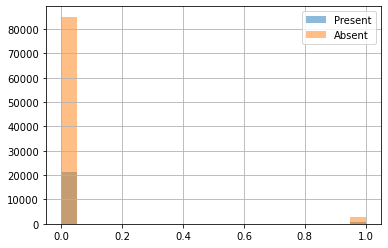

In [30]:
df.Alcoholism[Present].hist(alpha=0.5, bins=20, label='Present')
df.Alcoholism[Absent].hist(alpha=0.5, bins=20, label='Absent')
plt.legend();

In [31]:
df.Handicap[Present].mean()

0.020137569010770205

In [32]:
df.Handicap[Absent].mean()

0.022632783934937867

In [33]:
df['Handicap'].describe()

count    109891.000000
mean          0.022131
std           0.160879
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: Handicap, dtype: float64

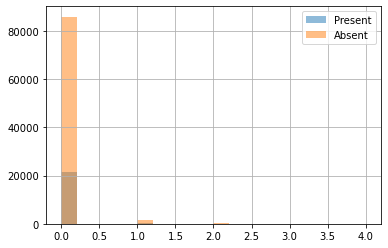

In [34]:
df.Handicap[Present].hist(alpha=0.5, bins=20, label='Present')
df.Handicap[Absent].hist(alpha=0.5, bins=20, label='Absent')
plt.legend();

> **We noticed**:
<ul>
<li>Most Patients with Hypertentsion  didn't show up for thier appointment"Hence it's the Most Preventing Factor"</li>
    <li>Also we have patients with a Maxium of 4 Handicaps</li>
   </ul>

   ### Let's Check if " Having a Handicap is a Preventing Factor for Patient to showup in the hospital"?
 so we have to check if having More than one handicap is a factor for not showing up for appointments

In [35]:
counts = df.groupby(['Handicap','No_show']).count()['Age']
counts

Handicap  No_show
0         No         85973
          Yes        21699
1         No          1665
          Yes          358
2         No           145
          Yes           37
3         No             8
          Yes            3
4         No             2
          Yes            1
Name: Age, dtype: int64

Text(0, 0.5, 'ShowUp counts')

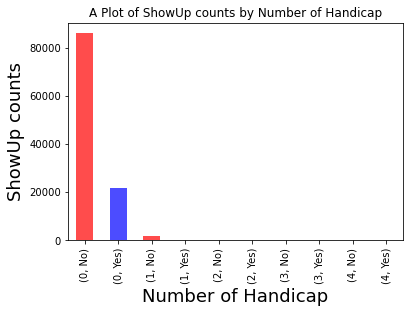

In [36]:
counts = df.groupby(['Handicap','No_show']).count()['Age']
counts
colors = ['red', 'blue']
counts.plot(kind='bar', title='A Plot of ShowUp counts by Number of Handicap', color=colors,alpha=.7);
plt.xlabel('Number of Handicap', fontsize=18)
plt.ylabel('ShowUp counts', fontsize=18)


> **We noticed**:
<ul>
<li>They are clearly more Patients with no Handicap than patients with atleast one Handicap </li>
    <li>let Balance this out by dividing each count by the total count for that hadicap and use propotons instead</li>
   </ul>

Text(0, 0.5, 'ShowUp counts')

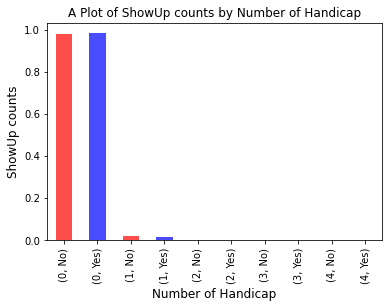

In [37]:
totals = df.groupby('No_show').count()['Age']
proportions = counts / totals
proportions.plot(kind='bar', title='A Plot of ShowUp counts by Number of Handicap', color=colors, alpha=.7);
plt.xlabel('Number of Handicap', fontsize=12)
plt.ylabel('ShowUp counts', fontsize=12)

> **Result**:
<ul>
<li>We see that having a handicap or not is not a reason for not showing up in the hospital</li>
   </ul>

### Research Question 2 (Which Age is mostly affected by this factor)

In [38]:
def blood_pressure(Hypertension):
    if Hypertension == 0:
        return 'NotHypertensive'
    else:
        return 'Hypertensive'

df['Blood_pressure'] = df['Hypertension'].apply(blood_pressure)

print(df.head(2))

  Gender          ScheduledDay        AppointmentDay  Age    Neighbourhood  \
0      F  2016-04-29T18:38:08Z  2016-04-29T00:00:00Z   62  JARDIM DA PENHA   
1      M  2016-04-29T16:08:27Z  2016-04-29T00:00:00Z   56  JARDIM DA PENHA   

   Scholarship  Hypertension  Diabetes  Alcoholism  Handicap  SMS_received  \
0            0             1         0           0         0             0   
1            0             0         0           0         0             0   

  No_show   Blood_pressure  
0      No     Hypertensive  
1      No  NotHypertensive  


In [39]:
Hypertensive = df.query("Blood_pressure =='Hypertensive'")
NotHypertensive = df.query(" Blood_pressure =='NotHypertensive'")

In [40]:
Hypertensive=df.Blood_pressure=='Hypertensive'
NotHypertensive =df.Blood_pressure =='NotHypertensive'

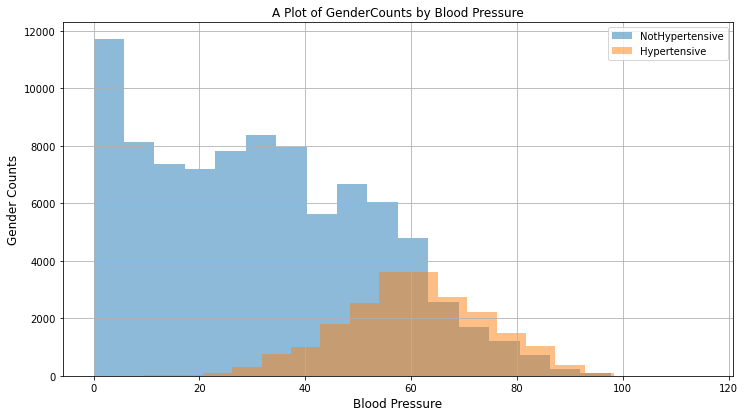

In [41]:
plt.figure(figsize=[12,6.5])

df.Age[NotHypertensive].hist(alpha=0.5, bins=20, label='NotHypertensive')
df.Age[Hypertensive].hist(alpha=0.5, bins=20, label='Hypertensive')
plt.xlabel('Blood Pressure', fontsize=12)
plt.ylabel('Gender Counts', fontsize=12)
plt.title('A Plot of GenderCounts by Blood Pressure')
plt.legend();

> **Result**:
<ul>
<li>We noticed that the Ages Affected by Hypertension lie mainly between 20 to about 100 year </li>
   </ul>

<a id='conclusions'></a>
## Conclusions
><dd>In our dataset we discovered our Preventive Factor was Hypertension</dd>
> <dd>We also also saw that some patients could have more than one handicap but this didn't account for them
not showingup for and appointment we also attributed this to the fact that we had more Patients with no handicap and less patient with a handicap</dd> 
><dd>And finally we saw that patients affected by Hypertension lie mostly between the Ages of 20 to about 100</dd>

> **Limitations**: Our Invesgitation revealed that Hypertensive Patients don't always show up for hospital appointment.We also saw that patients with handicaps where not classified like other patient that is as **Been either handicap or not** but each patient with handicaps was classified according to the number of handicaps they have. Moreover the data provided on Patients with handicap was limited we had more patients with no handicap and less with handicaps and also dropping duplicate columns reduced the quqntity of patient data we had this result to us not been able to prove wethere or not the patient's handicap was a preventing factor for not showing up.Therefore the Insufficent of data might cause our results to not be completely error free and having more data on the patients will help us Know better if the fact that patients have a handicap is more of a preventive factor than hypertension or not.



## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [42]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295